In [ ]:
import pandas as pd

In [7]:
from pandas import DataFrame


train: DataFrame = pd.read_csv(filepath_or_buffer="../data/category_train.csv")
test: DataFrame = pd.read_csv(filepath_or_buffer="../data/category_test.csv")

print(train.shape)
print(test.shape)

(82018, 2)
(28983, 2)


In [ ]:
train.head()

,category,crimeaditionalinfo
0,Women/Child Related Crime,I had continue received random calls and abusi...
1,Financial Fraud Crimes,The above fraudster is continuously messaging ...
2,Other Cyber Crime,He is acting like a police and demanding for m...
3,Women/Child Related Crime,In apna Job I have applied for job interview f...
4,Financial Fraud Crimes,I received a call from lady stating that she w...


In [ ]:
# rename category column to text
train.rename(columns={"crimeaditionalinfo": "text", "category": "label_name"}, inplace=True)
train

,label_name,text
0,Women/Child Related Crime,I had continue received random calls and abusi...
1,Financial Fraud Crimes,The above fraudster is continuously messaging ...
2,Other Cyber Crime,He is acting like a police and demanding for m...
3,Women/Child Related Crime,In apna Job I have applied for job interview f...
4,Financial Fraud Crimes,I received a call from lady stating that she w...
...,...,...
82013,Financial Fraud Crimes,Identity theft Smishing SMS Fraud CreditDeb...
82014,Financial Fraud Crimes,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...
82015,Financial Fraud Crimes,Cyber Stalking Blackmailing PhoneSMSVOIP C...
82016,Women/Child Related Crime,Call karke bola ki aapka lotary laga ha aru AC...


In [ ]:
# rename category column to text
test.rename(columns={"crimeaditionalinfo": "text", "category": "label_name"}, inplace=True)
test

,label_name,text
0,Financial Fraud Crimes,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT
1,Other Cyber Crime,The issue actually started when I got this ema...
2,Financial Fraud Crimes,I am amit kumar from karwi chitrakoot I am tot...
3,Other Cyber Crime,I have ordered saree and blouse from rinki s...
4,Financial Fraud Crimes,My salary of amount has to be credited to my ...
...,...,...
28978,Women/Child Related Crime,A lady named Rashmi probably a fake name had c...
28979,Financial Fraud Crimes,I am Mr Chokhe Ram Two pers mobile number wer...
28980,Other Cyber Crime,Mai Bibekbraj maine pahle ki complain kar chuk...
28981,Financial Fraud Crimes,received URL link for updating KYC from mobile...


In [ ]:
# # Drop column Words per Tweet
# train.drop(columns=["Words per Tweet"], inplace=True, axis = 1)

In [ ]:
train

,label_name,text
0,Women/Child Related Crime,I had continue received random calls and abusi...
1,Financial Fraud Crimes,The above fraudster is continuously messaging ...
2,Other Cyber Crime,He is acting like a police and demanding for m...
3,Women/Child Related Crime,In apna Job I have applied for job interview f...
4,Financial Fraud Crimes,I received a call from lady stating that she w...
...,...,...
82013,Financial Fraud Crimes,Identity theft Smishing SMS Fraud CreditDeb...
82014,Financial Fraud Crimes,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...
82015,Financial Fraud Crimes,Cyber Stalking Blackmailing PhoneSMSVOIP C...
82016,Women/Child Related Crime,Call karke bola ki aapka lotary laga ha aru AC...


In [ ]:
train["label_name"].unique()

array(['Women/Child Related Crime', 'Financial Fraud Crimes',
       'Other Cyber Crime'], dtype=object)

In [ ]:
# create a column called label and map it with label_name starting from 0
train["label"] = train["label_name"].map({"Women/Child Related Crime": 0, "Financial Fraud Crimes": 1, "Other Cyber Crime": 2})

In [ ]:
train

,label_name,text,label
0,Women/Child Related Crime,I had continue received random calls and abusi...,0
1,Financial Fraud Crimes,The above fraudster is continuously messaging ...,1
2,Other Cyber Crime,He is acting like a police and demanding for m...,2
3,Women/Child Related Crime,In apna Job I have applied for job interview f...,0
4,Financial Fraud Crimes,I received a call from lady stating that she w...,1
...,...,...,...
82013,Financial Fraud Crimes,Identity theft Smishing SMS Fraud CreditDeb...,1
82014,Financial Fraud Crimes,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...,1
82015,Financial Fraud Crimes,Cyber Stalking Blackmailing PhoneSMSVOIP C...,1
82016,Women/Child Related Crime,Call karke bola ki aapka lotary laga ha aru AC...,0


In [ ]:
test.head()

,label_name,text
0,Financial Fraud Crimes,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT
1,Other Cyber Crime,The issue actually started when I got this ema...
2,Financial Fraud Crimes,I am amit kumar from karwi chitrakoot I am tot...
3,Other Cyber Crime,I have ordered saree and blouse from rinki s...
4,Financial Fraud Crimes,My salary of amount has to be credited to my ...


Text(0.5, 1.0, 'Frequency of Classes')

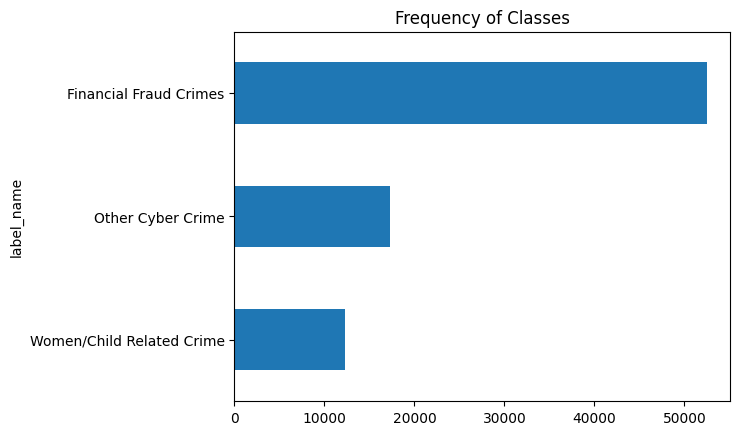

In [ ]:
import matplotlib.pyplot as plt

label_counts = train["label_name"].value_counts(ascending=True)
label_counts.plot.barh()
plt.title(label="Frequency of Classes")

In [ ]:
from transformers import AutoTokenizer
from transformers.tokenization_utils import PreTrainedTokenizer
from transformers.tokenization_utils_fast import PreTrainedTokenizerFast

In [ ]:
model_checkpoint = "bert-base-uncased"
tokenizer: PreTrainedTokenizer | PreTrainedTokenizerFast = (
    AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_checkpoint)
)

In [ ]:
from sklearn.model_selection import train_test_split

test, val = train_test_split(test, test_size=1 / 3, stratify=test["label_name"])

train.shape, test.shape, val.shape

((82018, 3), (19322, 2), (9661, 2))

In [ ]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict(
    {
        "train": Dataset.from_pandas(df=train, preserve_index=False),
        "test": Dataset.from_pandas(df=test, preserve_index=False),
        "val": Dataset.from_pandas(df=val, preserve_index=False),
    }
)

dataset

DatasetDict({
    train: Dataset({
        features: ['label_name', 'text', 'label'],
        num_rows: 82018
    })
    test: Dataset({
        features: ['label_name', 'text'],
        num_rows: 19322
    })
    val: Dataset({
        features: ['label_name', 'text'],
        num_rows: 9661
    })
})

In [ ]:
from transformers.tokenization_utils_base import BatchEncoding


def tokenize(batch) -> BatchEncoding:
    return tokenizer(batch["text"], truncation=True)

In [ ]:
print(dataset["train"][0])
print(tokenize(dataset["train"][0]))

{'label_name': 'Women/Child Related Crime', 'text': 'I had continue received random calls and abusive messages in my whatsapp Someone added my number in a unknown facebook group name with  Only Girls  and still getting calls from unknown numbers pls help me and sort out the issue  as soon as possible Thank you', 'label': 0}
{'input_ids': [101, 1045, 2018, 3613, 2363, 6721, 4455, 1998, 20676, 7696, 1999, 2026, 2054, 3736, 9397, 2619, 2794, 2026, 2193, 1999, 1037, 4242, 9130, 2177, 2171, 2007, 2069, 3057, 1998, 2145, 2893, 4455, 2013, 4242, 3616, 20228, 2015, 2393, 2033, 1998, 4066, 2041, 1996, 3277, 2004, 2574, 2004, 2825, 4067, 2017, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
from datasets.dataset_dict import DatasetDict


encoded_data: DatasetDict = dataset.map(
    function=tokenize, batched=True, batch_size=None
)

encoded_data

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Map:   0%|          | 0/82018 [00:00<?, ? examples/s]

KeyboardInterrupt: 

In [ ]:
# mapping with label2id, id2label

label2id = {x["label_name"]: x["label"] for x in dataset["train"]}
id2label = {x["label"]: x["label_name"] for x in dataset["train"]}

print(label2id)
print(id2label)

{'Women/Child Related Crime': 0, 'Financial Fraud Crimes': 1, 'Other Cyber Crime': 2}
{0: 'Women/Child Related Crime', 1: 'Financial Fraud Crimes', 2: 'Other Cyber Crime'}


## Model Config

In [ ]:
from transformers import AutoModel
import torch
model_checkpoint

'bert-base-uncased'

In [ ]:
model = AutoModel.from_pretrained(pretrained_model_name_or_path=model_checkpoint)

print(model)

## Loading Model

In [ ]:
num_labels: int = len(label2id)
print(num_labels)

device = torch.device(device="cuda" if torch.cuda.is_available() else "cpu")
print(device)

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoConfig

config = AutoConfig.from_pretrained(
    pretrained_model_name_or_path=model_checkpoint,
    label2id=label2id,
    id2label=id2label,
    num_labels=num_labels,
)

model = AutoModelForSequenceClassification.from_pretrained(
    pretrained_model_name_or_path=model_checkpoint, config=config
).to(device)

In [ ]:
model

In [ ]:
model.config

## Training Arguments

In [ ]:
from transformers import Trainer, TrainingArguments

BATCH_SIZE = 64
TRAINING_DIR = "bert_base_train"

training_args = TrainingArguments(
    learning_rate=2e-5,
    output_dir=TRAINING_DIR,
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    evaluation_strategy="epoch",
    weight_decay=0.01,
    disable_tqdm=False,
)

In [ ]:
import evaluate
import numpy as np

accuracy: evaluate.EvaluationModule = evaluate.load("accuracy")


def compute_metrics_evaluate(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(a=predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
# Use skleaarn if not want to use evaluate
from sklearn.metrics import accuracy_score, f1_score


def compute_metrics_sklearn(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [ ]:
dataset

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_data["train"],
    eval_dataset=encoded_data["val"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics_sklearn,
)

In [ ]:
# finetune
trainer.train()

## Evauation

In [ ]:
from transformers.trainer_utils import PredictionOutput


preds_output: PredictionOutput = trainer.predict(test_dataset=encoded_data["test"])
preds_output.metrics

In [ ]:
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = encoded_data["test"][:]["label"]

In [ ]:
from sklearn.metrics import classification_report

classification_report(y_true, y_pred)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(
    data=cm,
    annot=True,
    fmt="d",
    xticklabels=label2id.keys(),
    yticklabels=label2id.keys(),
    cbar=False,
    cmap="Reds",
)
plt.title(label="Confusion matrix")
plt.ylabel(ylabel="Actual label")
plt.xlabel(xlabel="Predicted label")

## Save Model

In [ ]:
# save model
trainer.save_model("bert-base-uncased-sentiment")

In [ ]:
from transformers import pipeline

classifier = pipeline("text-classification", model="bert-base-uncased-sentiment")
print(classifier(text))
print(classifier(text))